In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel('/home/touro/CreditCardPrediction/CreditCardDefaultPrediction/dados/cartao_credito_excel.xls')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [11]:
df.shape
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [12]:
df.isnull().mean() * 100

ID                            0.0
LIMIT_BAL                     0.0
SEX                           0.0
EDUCATION                     0.0
MARRIAGE                      0.0
AGE                           0.0
PAY_1                         0.0
PAY_2                         0.0
PAY_3                         0.0
PAY_4                         0.0
PAY_5                         0.0
PAY_6                         0.0
BILL_AMT1                     0.0
BILL_AMT2                     0.0
BILL_AMT3                     0.0
BILL_AMT4                     0.0
BILL_AMT5                     0.0
BILL_AMT6                     0.0
PAY_AMT1                      0.0
PAY_AMT2                      0.0
PAY_AMT3                      0.0
PAY_AMT4                      0.0
PAY_AMT5                      0.0
PAY_AMT6                      0.0
default payment next month    0.0
dtype: float64

In [13]:
# Check for duplicate rows based on the unique 'ID' column
df['ID'].nunique()

# Drop duplicate rows if found
df.drop_duplicates(inplace=True)

# Check if duplicates were successfully removed
df['ID'].nunique()

29687

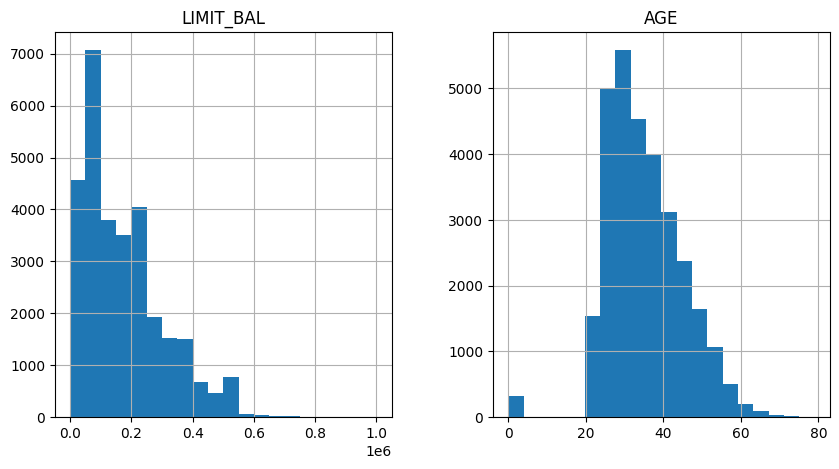

In [17]:
# Plotting histograms for numerical columns to check the distribution
df[['LIMIT_BAL', 'AGE']].hist(bins=20, figsize=(10, 5))
plt.show()

In [19]:
# Check for unexpected or invalid values in the 'PAY_1' column
df['PAY_1'].value_counts()

# Since 'PAY_1' contains invalid entries like 'Not available', let's filter those out
valid_pay_1_mask = df['PAY_1'] != 'Not available'

# Keep only rows where 'PAY_1' has valid values
df_clean_1 = df.loc[valid_pay_1_mask, :].copy()

# Verify that invalid entries were removed
df_clean_1['PAY_1'].value_counts()

PAY_1
0     13402
-1     5047
1      3261
-2     2476
2      2378
3       292
4        63
5        23
8        17
6        11
7         9
Name: count, dtype: int64

In [20]:
# Convert 'PAY_1' to the correct data type (int64)
df_clean_1['PAY_1'] = df_clean_1['PAY_1'].astype('int64')

# Verify the data type of 'PAY_1' after conversion
df_clean_1[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 26979 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26979 non-null  int64
 1   PAY_2   26979 non-null  int64
dtypes: int64(2)
memory usage: 632.3 KB


In [21]:
# Create a mask to identify rows where all features (except the 'ID') are zero
feature_zero_mask = df_clean_1.iloc[:, 1:].eq(0).all(axis=1)

# Remove rows where all values (except 'ID') are zero
df_clean_2 = df_clean_1.loc[~feature_zero_mask, :].copy()

# Check the shape of the cleaned DataFrame
df_clean_2.shape

(26664, 25)

In [22]:
# Check for invalid values in the 'EDUCATION' column
df_clean_2['EDUCATION'].value_counts()

# Replace invalid education levels (0, 5, 6) with '4' (Others)
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)

# Verify the correction in the 'EDUCATION' column
df_clean_2['EDUCATION'].value_counts()

/tmp/ipykernel_5154/4120712231.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)


EDUCATION
2    12458
1     9412
3     4380
4      414
Name: count, dtype: int64

In [23]:
# Check for invalid values in the 'MARRIAGE' column
df_clean_2['MARRIAGE'].value_counts()

# Replace invalid marriage values (0) with '3' (Others)
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)

# Verify the correction in the 'MARRIAGE' column
df_clean_2['MARRIAGE'].value_counts()

/tmp/ipykernel_5154/1076861451.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)


MARRIAGE
2    14158
1    12172
3      334
Name: count, dtype: int64

In [25]:
# Check the final shape of the cleaned dataset after all corrections
df_clean_2.shape

# Display the first few rows of the cleaned dataset
df_clean_2.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [29]:
# Save the cleaned dataset to a new Excel file for future use
df_clean_2.to_excel('/home/touro/CreditCardPrediction/CreditCardDefaultPrediction/dados/cleaned_cartao_credito.xlsx', index=False)